# COGS 108 - Final Project

## Permissions

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

- [X] YES - make available
- [ ] NO - keep private

## Overview

## Names

- Gadi Rosen
- Rujvi Mehendre
- Henry Lozada
- Joshua Paz

## Group Members IDs

- A16105613
- A14553468
- A15127559
- A13300845

## Research Question

"_How has the outbreak of COVID-19 affected food security in communities in the greater San Diego area?_"

## Background & Prior Work

#### Why is this project of interest to your group?
 The pandemic has claimed many lives, but its impact on the US goes beyond that. People of limited financial means have been disproportionately affected by the stay-at-home orders issued. In light of this, we believe it’s important to consider how the pandemic, and the stay-at-home orders issued, affect people’s livelihoods and access to food.

#### What background information led to your hypothesis?
 Certain communities in the greater San Diego area had suffered from food insecurity prior to the advent of this pandemic1. According to an article on Fortune magazine2, since the beginning of the pandemic, unemployment has skyrocketed from 4% to nearly 18%. Another article by Fortune3, published 04/09/2020, states that “The total weekly claims fell close to 1.4 million from last week's 6.6 million initial unemployment claims.” Furthermore, according to an article published on yahoo! finance4, “Economists had been expecting the report to show the ranks of jobless Americans increasing by 5.5 million.” Meanwhile, information made available by the USDA5 indicates that food production has been decreasing as a result of the pandemic. Consequently, food banks are reporting an unprecedented increase in demand6, and the possibility of the US facing a food crisis is real.

#### Why is this important?
 We believe that this pandemic’s impact on the US goes beyond the lives it has claimed. The advent of the pandemic has resulted in stay-at-home orders which have increased the number of jobless Americans, limiting their financial resources and thus their ability to secure basic necessities, such as food. An analysis of the pandemic’s effect on the public’s access to food could result in a better understanding of the area’s food supply chain, which could be used by decision-makers and other relevant stakeholders to alleviate current shortages, and perhaps to prevent other shortages from occurring in the future.

#### What has already been done on this topic? What is already known?
 COVID-197 is a respiratory virus that is highly contagious and has infected well over 210 countries around the world, resulting in an on-going global pandemic. In order to curtail the spread of the disease, many governments have issued strict stay-at-home directives. These directives have resulted in the closure of businesses and increased unemployment.

 There have been studies and visualizations done in many countries worldwide highlighting spots where food insecurity is prevalent. These studies demonstrate that COVID-19 has only aggravated food insecurity, especially in countries where food insecurity was already prevalent.

#### References:
1. Food deserts and access to fresh food in low-income San Diego / by Emily Theresa Puhl
2. 22 million have lost their jobs over the past month—real unemployment rate likely nearing 18%
3. Real unemployment in the United States has likely hit 14.7%, the highest level since 1940
4. Jobless claims: Another 5.245 million Americans file for unemployment benefits
5. USDA - Quick Stats
6. A perfect storm: US facing hunger crisis as demand for food banks soars
7. COVID-19
#### Additional sources:
1. San Diego Hunger Coalition
2. UCSD Community Health
3. Foods Typically Purchased by Supplemental Nutrition Assistance Program (SNAP) Households
4. Food Security Information Network
5. Feeding San Diego
6. Neighborhood distribution Program
7. Food assistance during COVID-19 Pandemic
8. Greater Pittsburgh Community Foodbank - Our response to COVID-19
9. USDA - Coronavirus Disease
10. Nutritional Goals for Age-Sex Groups Based on Dietary Reference Intakes and Dietary Guidelines Recommendations

### Hypothesis:
The outbreak of COVID-19 has negatively impacted individuals’ access to food, disproportionately affecting the financially insecure and communities of color. These groups were already limited in their ability to provide for themselves and their families, and the pandemic has only made it more difficult for them to do so.

### Data:
1. San Diego Foodbank - Lbs of food distributed
2. SANDAG/SanGIS regional GIS data
2. SANDAG 2018 population estimates by Zip

### Setup

In [1]:
# Imports
%matplotlib inline
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [2]:
df = pd.read_excel(r"C:\Users\HELoz\Downloads\Household Population ZIP.xlsx")
df.head()

,ZIP,YEAR,HOUSING TYPE,POPULATION
0,91901,2010,Group Quarters - College,0
1,91901,2010,Group Quarters - Military,0
2,91901,2010,Group Quarters - Other,273
3,91901,2010,Household Population,16688
4,91901,2011,Group Quarters - College,0


In [3]:
df = df[df['YEAR']==2018]
df

,ZIP,YEAR,HOUSING TYPE,POPULATION
32,91901,2018,Group Quarters - College,0
33,91901,2018,Group Quarters - Military,0
34,91901,2018,Group Quarters - Other,260
35,91901,2018,Household Population,17625
68,91902,2018,Group Quarters - College,0
...,...,...,...,...
4031,92536,2018,Household Population,488
4064,92672,2018,Group Quarters - College,0
4065,92672,2018,Group Quarters - Military,0
4066,92672,2018,Group Quarters - Other,0


In [4]:
df = df.groupby('ZIP')['POPULATION'].sum().to_frame()
df

,POPULATION
ZIP,
91901,17885
91902,17375
91905,2014
91906,3686
91910,82682
...,...
92173,27741
92182,2222
92259,0


In [5]:
#df.to_excel('Household Population ZIP.xlsx')

In [6]:
tempmap = gpd.read_file(r"C:\Users\HELoz\Downloads\Census_Data\Census_ZIP.shp")

pop = pd.read_excel("Household Population ZIP.xlsx")

sdmap= pd.merge(tempmap, pop, on='ZIP', how='left')
#tempmap
sdmap

,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,POPULATION
0,1,91901,Alpine,4.149899e+09,326021.908292,"POLYGON ((-12996038.867 3890080.229, -12995532...",17885
1,2,91902,Bonita,2.739094e+08,113257.374615,"POLYGON ((-13021233.214 3856660.495, -13021180...",17375
2,3,91905,Boulevard,2.735681e+09,241725.552214,"POLYGON ((-12938849.815 3862278.403, -12938452...",2014
3,4,91906,Campo,3.066759e+09,287410.325075,"POLYGON ((-12952777.843 3856161.110, -12952835...",3686
4,5,91910,Chula Vista,4.034374e+08,112587.791814,"POLYGON ((-13031455.246 3848954.228, -13031444...",82682
...,...,...,...,...,...,...,...
118,119,92173,San Ysidro,1.103674e+08,52066.797099,"POLYGON ((-13031628.853 3838249.686, -13031502...",27741
119,120,92182,San Diego,9.608105e+06,17525.597204,"POLYGON ((-13032564.287 3866041.974, -13032228...",2222
120,121,92259,Ocotillo,1.978752e+09,194340.478076,"POLYGON ((-12924552.762 3879237.154, -12924543...",0
121,122,92536,Aguanga,1.389177e+09,206176.033344,"POLYGON ((-12990268.688 3952174.653, -12989354...",491


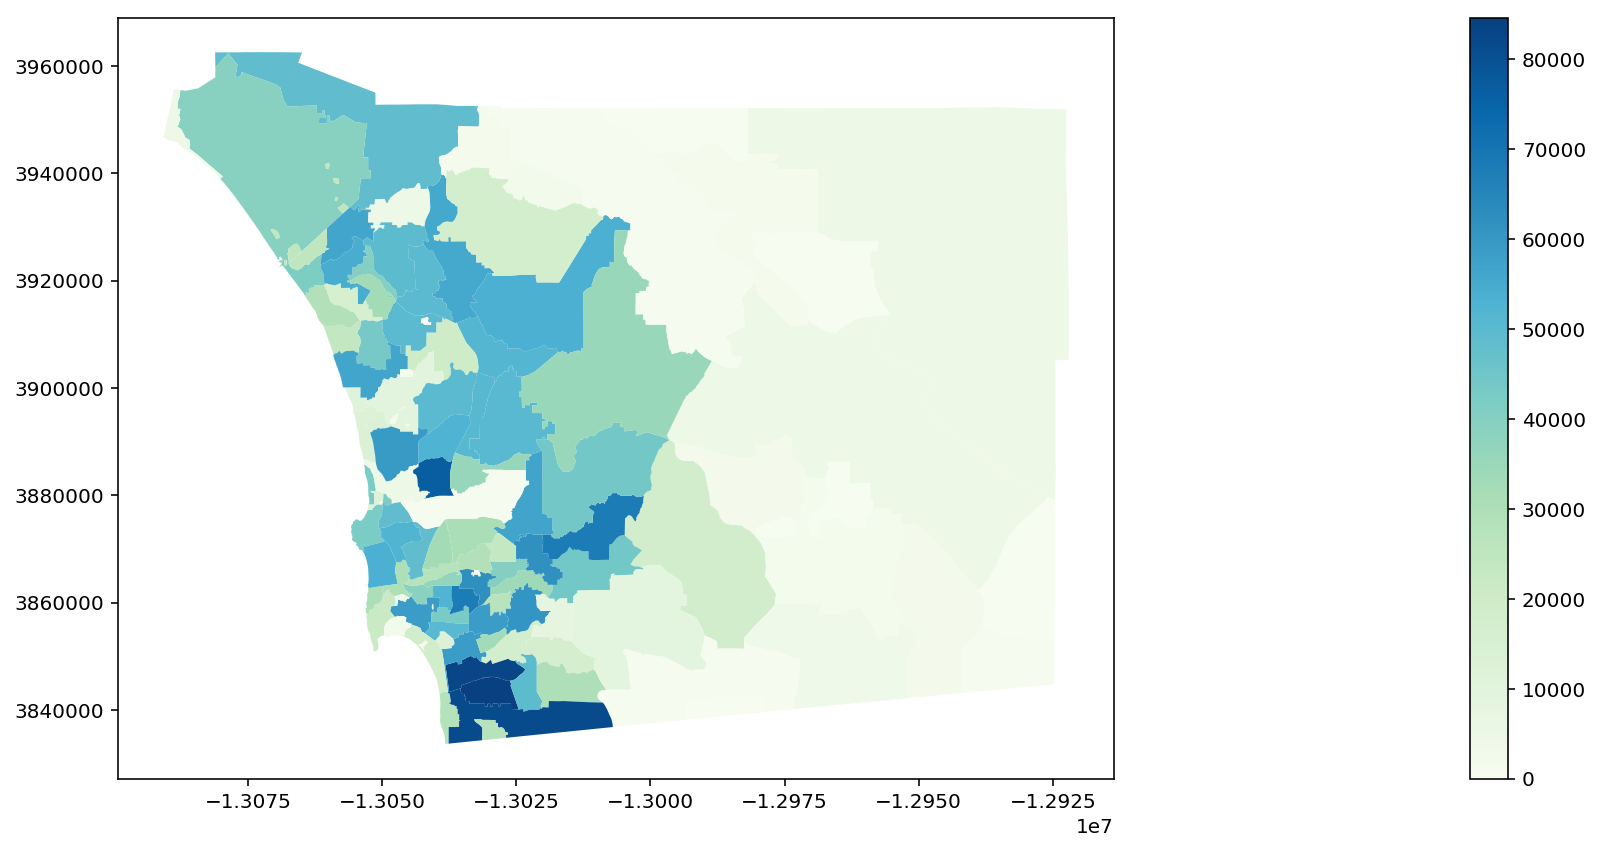

In [7]:
#Population by Zip code
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
sdmap.plot(column='POPULATION', ax=ax, cmap='GnBu', legend=True);

In [8]:
addresses = gpd.read_file('ADDRESS_APN.shp')

DriverError: ADDRESS_APN.shp: No such file or directory

In [ ]:
addresses[addresses['ADDRNAME'] == 'GRAPEVINE']

In [ ]:
#630 grapvine Vista isn't in addresses!
addresses[(addresses['ADDRNAME'] == 'DEL MAR HEIGHTS') & (addresses['ADDRNMBR'] == 555.0)]

In [9]:
#Read in all foodbank data
#2019
Jan2019 = pd.read_excel("Jan 2019.xlsx")
Feb2019 = pd.read_excel("Feb 2019.xlsx")
Mar2019 = pd.read_excel("Mar 2019.xlsx")
Apr2019 = pd.read_excel("Apr 2019.xlsx")
#2020
Jan2020 = pd.read_excel("Jan 2020.xlsx")
Feb2020 = pd.read_excel("Feb 2020.xlsx")
Mar2020 = pd.read_excel("Mar 2020.xlsx")
Apr2020 = pd.read_excel("Apr 2020.xlsx")

#Note: Number of foodbanks sampled varies from year to year and month to month.
#----------------------------------------------------------------------------------
    # Jan 2019: 452
    # Feb 2019: 387
    # Mar 2019: 431
    # Apr 2019: 418
    #--------------
    # Jan 2020: 486
    # Feb 2020: 331
    # Mar 2020: 481
    # Apr 2020: 454
#----------------------------------------------------------------------------------
# Suggestion: Consider only foodbanks that consistently appear throughout all dfs.
# Solution: Merge all of the dfs by inner?

# DO BETTER
#col = pd.merge(Jan2019, Feb2019, on='STREET ADDRESS', how='inner')
#col = pd.merge(col, Mar2019, on='STREET ADDRESS', how='inner')
#col = pd.merge(col, Apr2019, on='STREET ADDRESS', how='inner')
#col = pd.merge(col, Jan2020, on='STREET ADDRESS', how='inner')
#col = pd.merge(col, Feb2020, on='STREET ADDRESS', how='inner')
#col = pd.merge(col, Mar2020, on='STREET ADDRESS', how='inner')
#col = pd.merge(col, Apr2020, on='STREET ADDRESS', how='inner')
#col.drop_duplicates(subset="STREET ADDRESS", inplace=True
#col2 = pd.merge(Jan2019, Feb2019, on='AGENCY #', how='inner')

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

food_banks = {}
data = [Jan2019, Jan2020, Feb2019, Feb2020, Mar2019, Mar2020, Apr2019, Apr2020]
for i in range(len(data)):
    for j, row in data[i].iterrows():
        if row['AGENCY #'] not in food_banks:
            if i > 0:
                continue
            food_banks[row['AGENCY #']] = { 'zip' : row['ZIP CODE'], 'months' : {} }
        food_banks[row['AGENCY #']]['months'][get_df_name(data[i])] = round(row['TOTAL LBS'])
        
#food_banks(map(lambda x: len(x['months']), food_banks))
food_banks = { k: v for k, v in food_banks.items() if len(v['months']) == len(data) }
food_banks

{'CFD-1152': {'zip': 91945.0,
  'months': {'Jan2019': 31993,
   'Jan2020': 19864,
   'Feb2019': 38819,
   'Feb2020': 27932,
   'Mar2019': 14831,
   'Mar2020': 39728,
   'Apr2019': 320,
   'Apr2020': 59282}},
 'CFD-1504': {'zip': 92025.0,
  'months': {'Jan2019': 3103,
   'Jan2020': 5874,
   'Feb2019': 3577,
   'Feb2020': 1840,
   'Mar2019': 4992,
   'Mar2020': 3641,
   'Apr2019': 10353,
   'Apr2020': 9927}},
 'CFD-151313': {'zip': 92028.0,
  'months': {'Jan2019': 15994,
   'Jan2020': 20104,
   'Feb2019': 15851,
   'Feb2020': 26117,
   'Mar2019': 14592,
   'Mar2020': 32234,
   'Apr2019': 15492,
   'Apr2020': 30520}},
 'CFD-151316': {'zip': 91910.0,
  'months': {'Jan2019': 17099,
   'Jan2020': 95468,
   'Feb2019': 13507,
   'Feb2020': 69137,
   'Mar2019': 3706,
   'Mar2020': 83683,
   'Apr2019': 12045,
   'Apr2020': 59063}},
 'CFD-151317': {'zip': 92103.0,
  'months': {'Jan2019': 13630,
   'Jan2020': 7729,
   'Feb2019': 11697,
   'Feb2020': 14227,
   'Mar2019': 8466,
   'Mar2020': 10381,


In [10]:
# If done correctly, there are only 193 foodbanks that appear in all records. We will work exclusively with these.
#col.reset_index(inplace=True)
#col.drop_duplicates(subset='STREET ADDRESS', inplace=True)
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#col.head(193)

#1. Sum total food distributed by ZIP 
#2. for each zip, calculate food/pop
#3. Generate map
#4. interpret the results
food = {}
for month in data:
    month_name = get_df_name(month)
    for k, v in food_banks.items():
        if month_name not in food:
            food[month_name] = { v['zip']: 0 }
        elif v['zip'] not in food[month_name]:
            food[month_name][v['zip']] = 0
        food[month_name][v['zip']] += v['months'][month_name]      
food

df1 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Jan2019'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df1 = df1.append(newrow, ignore_index=True)
df2 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Feb2019'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df2 = df2.append(newrow, ignore_index=True)
df3 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Mar2019'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df3 = df3.append(newrow, ignore_index=True)
df4 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Apr2019'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df4 = df4.append(newrow, ignore_index=True)
df5 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Jan2020'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df5 = df5.append(newrow, ignore_index=True)
df6 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Feb2020'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df6 = df6.append(newrow, ignore_index=True)
df7 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Mar2020'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df7 = df7.append(newrow, ignore_index=True)
df8 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Apr2020'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df8 = df8.append(newrow, ignore_index=True)

In [19]:
def adjust(df):
    adjusted_df = pd.merge(df, pop, on='ZIP', how='left')
    adjusted_df = adjusted_df[adjusted_df['POPULATION'] != 0]
    adjusted_df = adjusted_df.assign(ratio = adjusted_df['food_distributed'] / adjusted_df['POPULATION'])
    adjusted_df['ZIP'] = pd.to_numeric(adjusted_df['ZIP'])
    adjusted_df['food_distributed'] = pd.to_numeric(adjusted_df['food_distributed'])
    adjusted_df['ratio'] = pd.to_numeric(adjusted_df['ratio'])
    return adjusted_df

In [20]:
adjusted_df1 = adjust(df1)
adjusted_df2 = adjust(df2)
adjusted_df3 = adjust(df3)
adjusted_df4 = adjust(df4)
adjusted_df5 = adjust(df5)
adjusted_df6 = adjust(df6)
adjusted_df7 = adjust(df7)
adjusted_df8 = adjust(df8)

In [21]:
adjusted_df1.describe()

,ZIP,food_distributed,POPULATION,ratio
count,62.000000,62.000000,62.000000,62.000000
mean,92052.903226,32687.370968,39284.612903,1.596067
std,63.948163,34246.198488,20861.592086,2.794574
min,91910.000000,256.000000,566.000000,0.005147
25%,92019.250000,7910.000000,27846.500000,0.264322
50%,92064.500000,18477.500000,42448.000000,0.710847
75%,92105.750000,46249.500000,54190.750000,1.412659
max,92173.000000,137746.000000,84626.000000,17.881930


In [22]:
ratios1 = adjusted_df1.drop(['ZIP', 'food_distributed', 'POPULATION'], axis=1)
ratios2 = adjusted_df2.drop(['ZIP', 'food_distributed', 'POPULATION'], axis=1)
ratios3 = adjusted_df3.drop(['ZIP', 'food_distributed', 'POPULATION'], axis=1)
ratios4 = adjusted_df4.drop(['ZIP', 'food_distributed', 'POPULATION'], axis=1)
ratios5 = adjusted_df5.drop(['ZIP', 'food_distributed', 'POPULATION'], axis=1)
ratios6 = adjusted_df6.drop(['ZIP', 'food_distributed', 'POPULATION'], axis=1)
ratios7 = adjusted_df7.drop(['ZIP', 'food_distributed', 'POPULATION'], axis=1)
ratios8 = adjusted_df8.drop(['ZIP', 'food_distributed', 'POPULATION'], axis=1)
ratios1

,ratio
0,3.496311
1,0.530490
2,1.098604
3,1.665973
4,0.401708
...,...
57,0.287556
58,0.477421
59,9.574723
60,17.881930


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C367BF400>]],
      dtype=object)

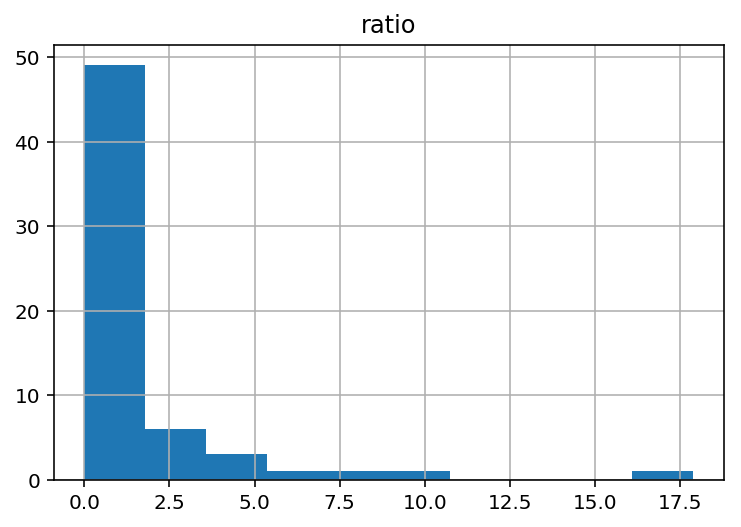

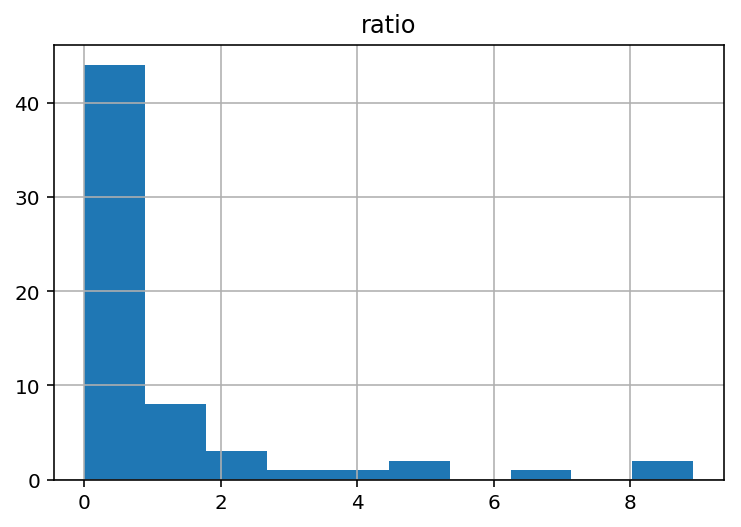

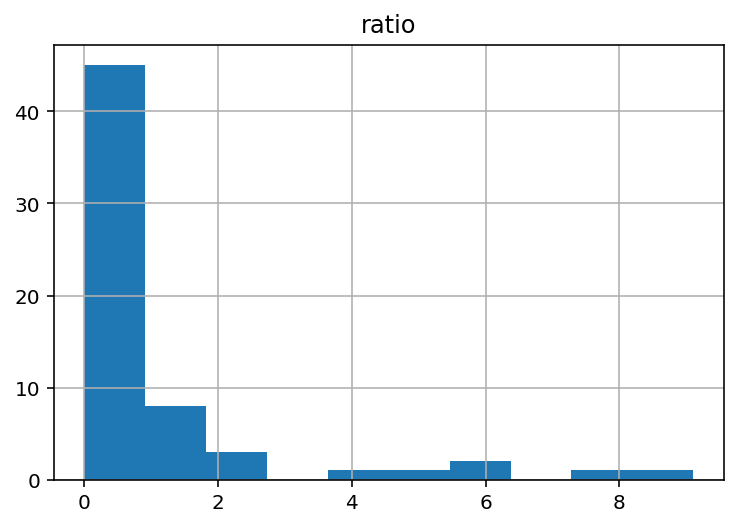

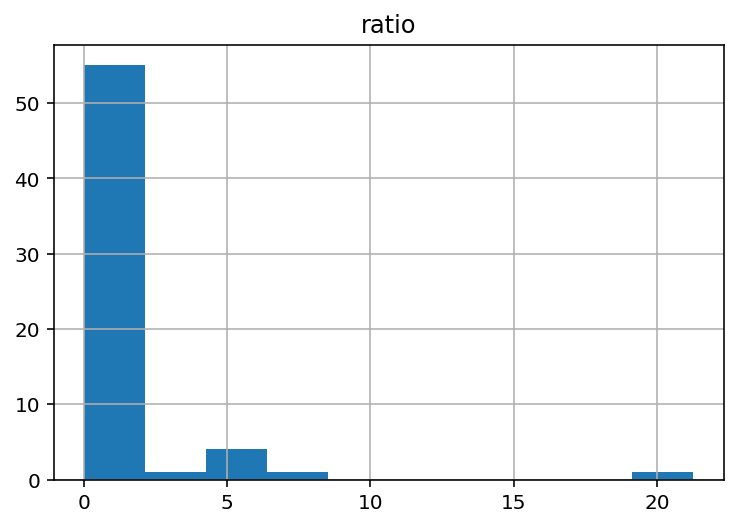

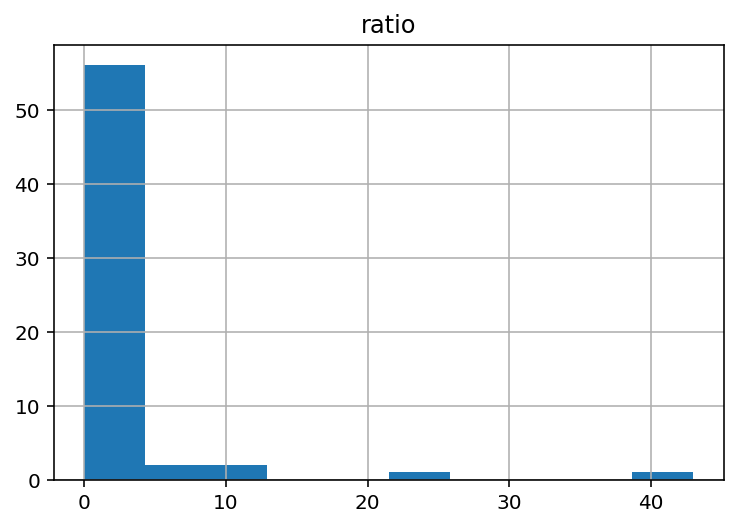

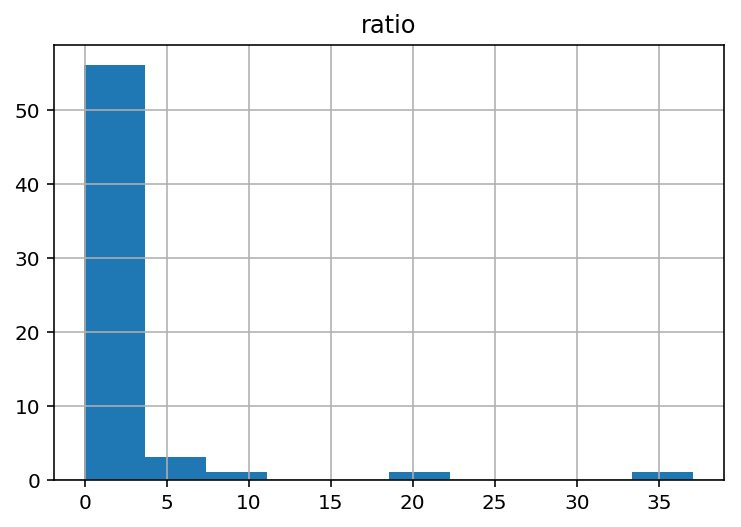

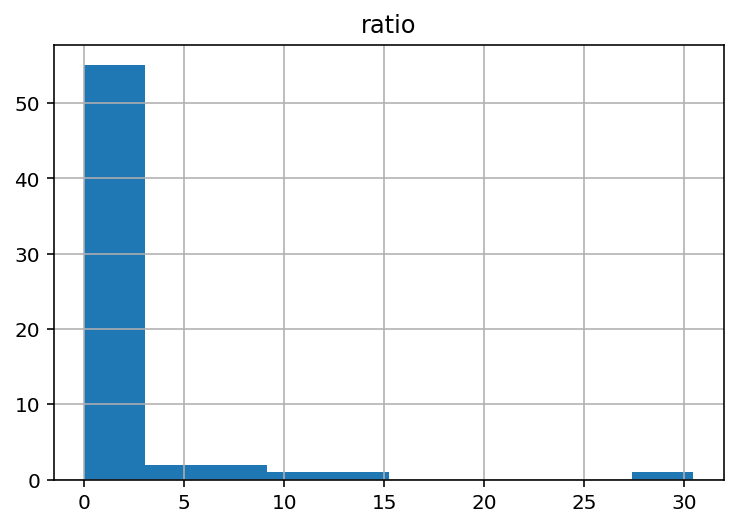

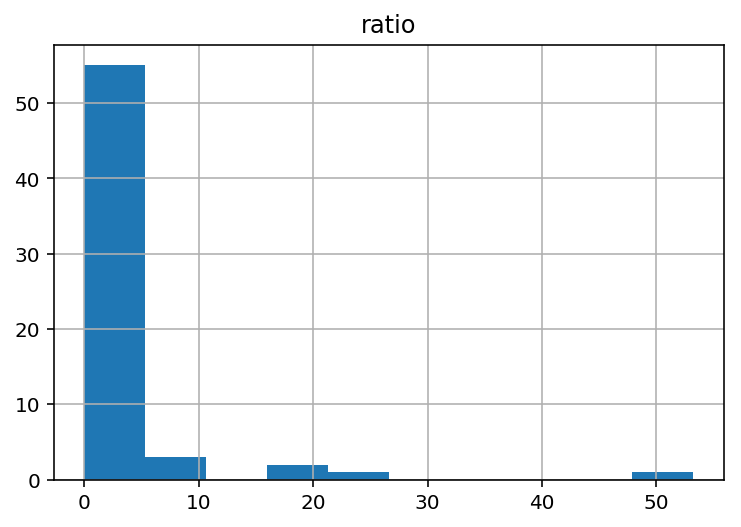

In [24]:
ratios1.hist()
ratios2.hist()
ratios3.hist()
ratios4.hist()
ratios5.hist()
ratios6.hist()
ratios7.hist()
ratios8.hist()

In [33]:
bootstrap1 = pd.DataFrame({'meanratio': [ratios1.sample(62, replace=True).ratio.mean() for i in range(1000)]})
bootstrap2 = pd.DataFrame({'meanratio': [ratios2.sample(62, replace=True).ratio.mean() for i in range(1000)]})
bootstrap3 = pd.DataFrame({'meanratio': [ratios3.sample(62, replace=True).ratio.mean() for i in range(1000)]})
bootstrap4 = pd.DataFrame({'meanratio': [ratios4.sample(62, replace=True).ratio.mean() for i in range(1000)]})
bootstrap5 = pd.DataFrame({'meanratio': [ratios5.sample(62, replace=True).ratio.mean() for i in range(1000)]})
bootstrap6 = pd.DataFrame({'meanratio': [ratios6.sample(62, replace=True).ratio.mean() for i in range(1000)]})
bootstrap7 = pd.DataFrame({'meanratio': [ratios7.sample(62, replace=True).ratio.mean() for i in range(1000)]})
bootstrap8 = pd.DataFrame({'meanratio': [ratios8.sample(62, replace=True).ratio.mean() for i in range(1000)]})

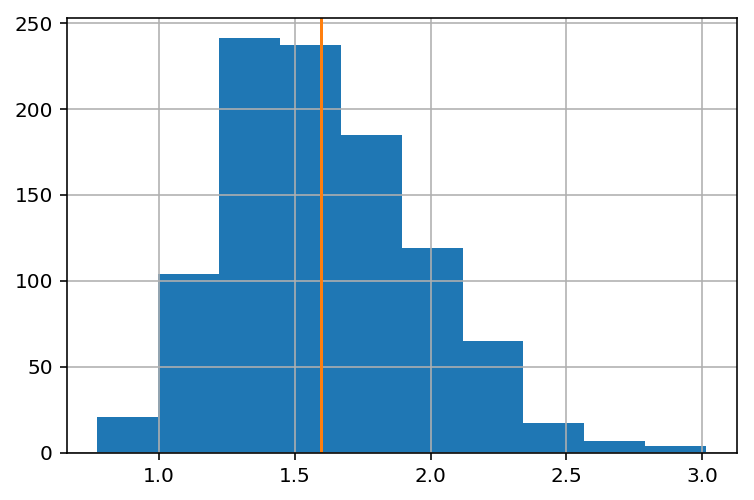

In [34]:
#Jan 2019
bootstrap1.meanratio.hist()
plt.axvline(ratios1.ratio.mean(), color='C1')

In [35]:
bootstrap1.meanratio.quantile(0.025), bootstrap1.meanratio.quantile(0.975)

(1.006564845192267, 2.364189186689039)

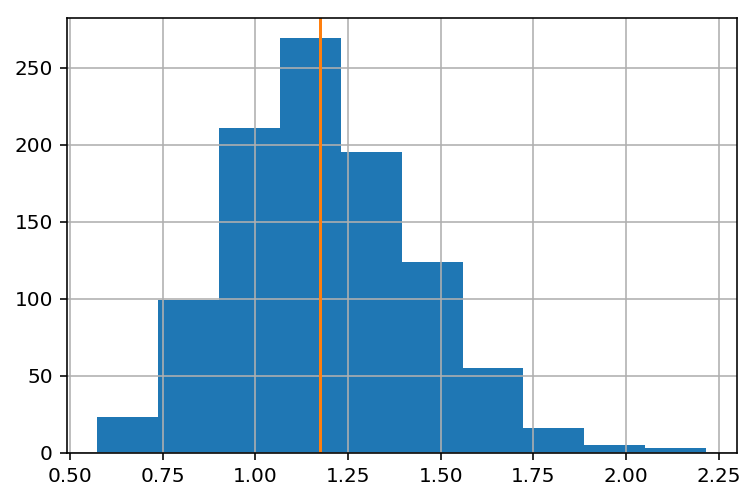

In [36]:
#Feb 2019
bootstrap2.meanratio.hist()
plt.axvline(ratios2.ratio.mean(), color='C1')

In [37]:
bootstrap2.meanratio.quantile(0.025), bootstrap2.meanratio.quantile(0.975)

(0.7449138973383819, 1.7100738636290653)

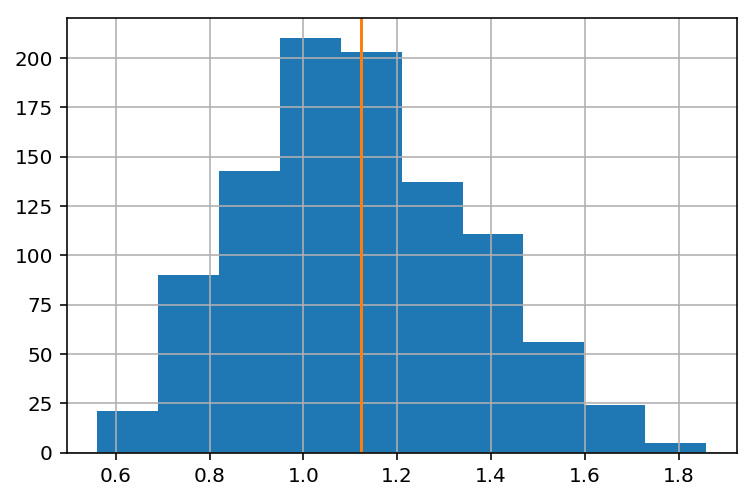

In [38]:
#Mar 2019
bootstrap3.meanratio.hist()
plt.axvline(ratios3.ratio.mean(), color='C1')

In [39]:
bootstrap3.meanratio.quantile(0.025), bootstrap3.meanratio.quantile(0.975)

(0.704040144168047, 1.6117696792704796)

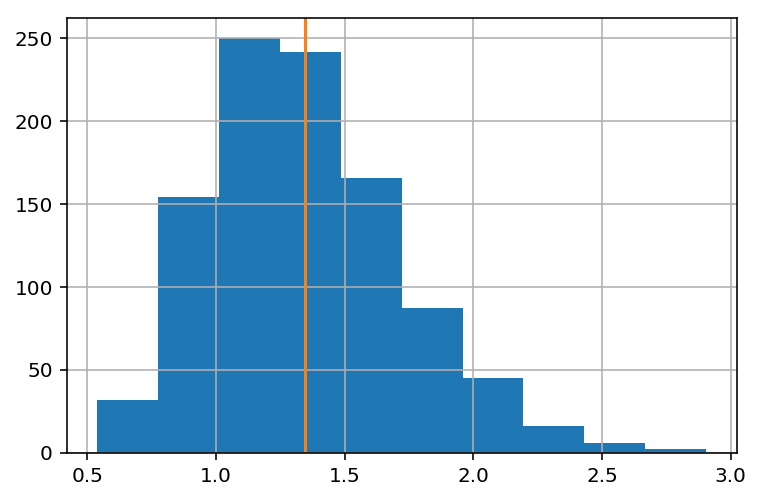

In [40]:
#Apr 2019
bootstrap4.meanratio.hist()
plt.axvline(ratios4.ratio.mean(), color='C1')

In [41]:
bootstrap4.meanratio.quantile(0.025), bootstrap4.meanratio.quantile(0.975)

(0.7474226078164979, 2.1892220954877706)

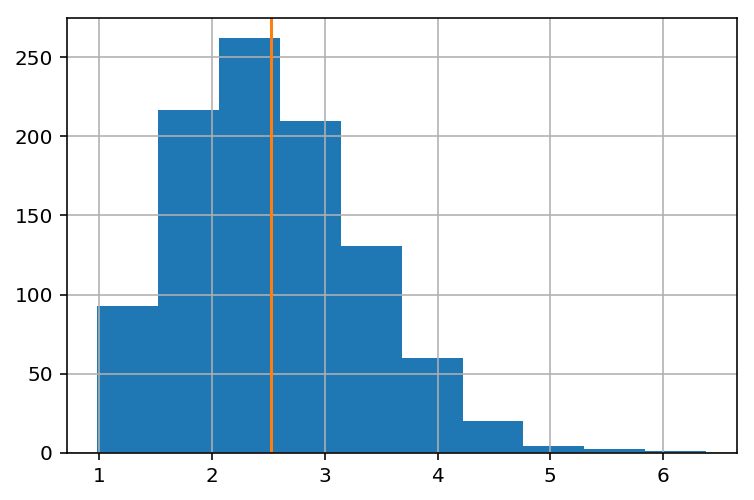

In [42]:
#Jan 2020
bootstrap5.meanratio.hist()
plt.axvline(ratios5.ratio.mean(), color='C1')

In [43]:
bootstrap5.meanratio.quantile(0.025), bootstrap5.meanratio.quantile(0.975)

(1.2527175440100922, 4.291445321643472)

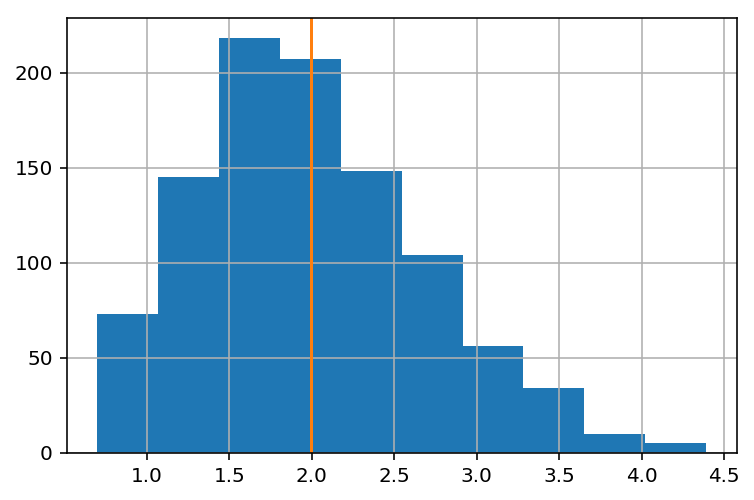

In [44]:
#Feb 2020
bootstrap6.meanratio.hist()
plt.axvline(ratios6.ratio.mean(), color='C1')

In [45]:
bootstrap6.meanratio.quantile(0.025), bootstrap6.meanratio.quantile(0.975)

(0.902968548752482, 3.5032491680695856)

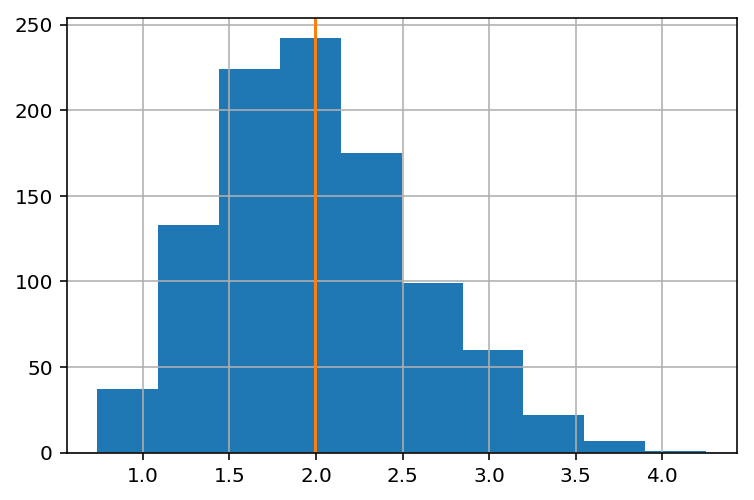

In [46]:
#Mar 2020
bootstrap7.meanratio.hist()
plt.axvline(ratios7.ratio.mean(), color='C1')

In [47]:
bootstrap7.meanratio.quantile(0.025), bootstrap7.meanratio.quantile(0.975)

(1.0178809501227943, 3.2342610021661438)

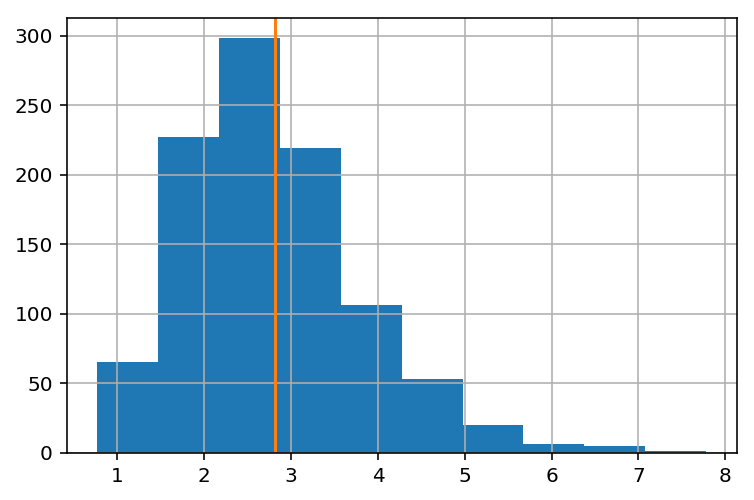

In [48]:
#Apr 2020
bootstrap8.meanratio.hist()
plt.axvline(ratios8.ratio.mean(), color='C1')

In [49]:
bootstrap8.meanratio.quantile(0.025), bootstrap8.meanratio.quantile(0.975)

(1.2551147446557693, 5.135639354648397)

In [50]:
#Apr 2019 mean
ratios4.ratio.mean()

1.346869799388088

In [51]:
#Apr 2020 mean
ratios8.ratio.mean()

2.8117495208515555

As expected, the mean ratio of foo

In [ ]:
sdmapJan2019 = pd.merge(tempmap, adjusted_df, on='ZIP', how='left')

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
#sdmapJan2019.dropna()
sdmapJan2019['food_distributed'].fillna(0, inplace = True)
sdmapJan2019['POPULATION'].fillna(0, inplace = True)
sdmapJan2019['ratio'].fillna(-5, inplace = True)

sdmapJan2019
sdmapJan2019.plot(column='ratio', ax=ax, cmap='GnBu', legend=True)


In [ ]:
def standardize_address(string):
    #initialize return values
    addrnumber = ""
    addrunit = ""
    addrname = ""
    addrsfx = ""
    addrsuite = ""
    #modify string
    string = string.upper()
    temp = string
    string = string.split(" ", 1)

    #handle edge cases with unit numbers
    if "-" in string[0]:
        string[0].split("-", 1)
        addrnumber = float(string[0].split("-")[0])
        addrunit = float(string[0].split("-")[1])
    #Handle PO boxes
    elif ("PO" in string) or ("P.O." in string):
        print(string)
    else:
        addrnumber = float(string[0])
        
    string = string[1]
    
    #Split on comma
    if "," in string:
        string = string.rsplit(",", 1)
        addrsuite = string[1].strip()
        string = string[0]

    # Check for broadway
    AveSuffixes = [' Avenue', ' Ave', ' Ave.']
    DriveSuffixes = [' Drive', ' Dr', ' Dr.']
    StreetSuffixes = [' Street', ' St.', ' St']
    RoadSuffixes = [' Road', ' Rd']
    BoulevardSuffixes = [' Boulevard', ' Blvd']

    if 'BROADWAY' in string:
        for e in StreetSuffixes: # AND broadway not in e
             if (e.upper() in string):
                addrsfx = 'ST'
                string = string.split(e.upper(), 1)
        

    for e in AveSuffixes:
        if e.upper() in string:
            addrsfx = 'AVE'
            string = string.split(e.upper(), 1)

    for e in RoadSuffixes:
        if e.upper() in string:
            addrsfx = 'RD'
            string = string.split(e.upper(), 1)

    for e in StreetSuffixes: # AND broadway not in e
         if (e.upper() in string):
            addrsfx = 'ST'
            string = string.split(e.upper(), 1)

    for e in DriveSuffixes:
        if e.upper() in string:
            addrsfx = 'DR'
            string = string.split(e.upper(), 1)

    for e in BoulevardSuffixes:
        if e.upper() in string:
            addrsfx = 'BLVD'
            string = string.split(e.upper(), 1)

    if " LANE" in string:
        addrsfx = 'LN'
        string = string.split("LANE", 1)

    elif " WAY" in string:
        addrsfx = 'WAY'
        try:
            string = string.split("WAY", 1)
        except:
            print(temp)
            print(string)

    elif " GLEN" in string:
        addrsfx = 'GLEN'
        string = string.split("GLEN", 1)

    elif " PARKWAY" in string:
        addrsfx = "PKWY"
        string = string.split("PARKWAY", 1)

    elif " TRAIL" in string:
        addrsfx = "TRL"
        string = string.split("TRAIL", 1)

    elif " CIRCLE" in string:
        addrsfx = "CIR"
        string = string.split("CIRCLE", 1)

    elif " TERRACE" in string:
        addrsfx = "TER"
        string = string.split("TERRACE", 1)

    elif " PLACE" in string:
        addrsfx = "PL"
        string = string.split("PLACE", 1)

    elif " PARK" in string:
        addrsfx = "PARK"
        string = string.split("PARK", 1)

    elif "COURT" in string:
        addrsfx = "CT"
        string = string.split("COURT", 1)

    elif " ROUTE" in string:
        addrsfx = "RTE" # Try RT if this doesn't work
        string = string.split("ROUTE", 1)
    
    if type(string) == str:
        addrname = string.strip()
    else:
        addrname = string[0].strip()

    #print(addrname)

    return addrnumber, addrunit, addrname, addrsfx, addrsuite

In [ ]:
# Edge cases:
# Broadway fails because way is in Broadway. Need to check for "Broadway" first. Note, broadway has no suffix
# Pentecost addresss fails because st in pentecost
# According to Andy Gordon, GIS analyst at SANDAG, the points in the Address_APN data set do not include PO Boxes.
df = pd.DataFrame(columns=addresses.columns)
for e in col['STREET ADDRESS']:
    try:
        ANUM, AU, AD, SF, STE = standardize_address(e)
        #print(ANUM, AU, AD, SF, STE)
        df = df.append(addresses[(addresses['ADDRNMBR'] == ANUM) & (addresses['ADDRNAME'] == AD) & (addresses['ADDRSFX'] == SF)])
    except:
        print(e)


In [ ]:
#Not all addresses in the food bank data appeared in the addresses data set, so we'll have to work with what we've got.

In [ ]:
df.duplicated(['ADDRNMBR', 'ADDRNAME', 'ADDRSFX'])